<a href="https://colab.research.google.com/github/Shakshi3104/isJohnnys/blob/master/JohnnyFace_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.1.0

In [ ]:
import tensorflow as tf

tf.__version__

'2.1.0'

# ZIPファイルを展開

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!rm -R __MACOSX face
!unzip /content/drive/My\ Drive/Graduate/Data\ Mining\ \(データマイニング\)/2019/face.zip

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: __MACOSX/face/johnnys/二階堂高嗣/._img_52.jpg  
  inflating: face/johnnys/二階堂高嗣/img_53.jpg  
  inflating: __MACOSX/face/johnnys/二階堂高嗣/._img_53.jpg  
  inflating: face/johnnys/二階堂高嗣/img_50.png  
  inflating: __MACOSX/face/johnnys/二階堂高嗣/._img_50.png  
  inflating: face/johnnys/二階堂高嗣/img_83.jpg  
  inflating: __MACOSX/face/johnnys/二階堂高嗣/._img_83.jpg  
  inflating: face/johnnys/二階堂高嗣/img_97.jpg  
  inflating: __MACOSX/face/johnnys/二階堂高嗣/._img_97.jpg  
  inflating: face/johnnys/二階堂高嗣/img_68.jpeg  
  inflating: __MACOSX/face/johnnys/二階堂高嗣/._img_68.jpeg  
  inflating: face/johnnys/二階堂高嗣/img_54.jpg  
  inflating: __MACOSX/face/johnnys/二階堂高嗣/._img_54.jpg  
  inflating: face/johnnys/二階堂高嗣/img_55.jpg  
  inflating: __MACOSX/face/johnnys/二階堂高嗣/._img_55.jpg  
  inflating: face/johnnys/二階堂高嗣/img_41.jpg  
  inflating: __MACOSX/face/johnnys/二階堂高嗣/._img_41.jpg  
  inflating: face/johnnys/二階堂高嗣/img_69.jpg  
  inflating: __MACOSX/face/johnnys/二階堂高嗣/._img_69.jpg  
 

# コードの読み込み

In [ ]:
!rm -R isJohnnys*
!git clone https://github.com/Shakshi3104/isJohnnys.git

Cloning into 'isJohnnys'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 366 (delta 13), reused 26 (delta 9), pack-reused 327
Receiving objects: 100% (366/366), 949.05 KiB | 16.08 MiB/s, done.
Resolving deltas: 100% (174/174), done.


In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import sys

sys.path.append("/content/isJohnnys")

In [ ]:
import numpy as np
import pandas as pd

#  画像を読み込む

In [ ]:
from images.dataset import Dataset

In [ ]:
input_dir = "/content/face/"
dataset = Dataset(input_dir=input_dir, colab=True)
images, labels, detail_labels = dataset.load_data()

ストリーミング出力は最後の 5000 行に切り捨てられました。
/content/face/others/中村倫也/img_50.jpg
(64, 64, 3)
/content/face/others/中村倫也/img_34.jpg
(64, 64, 3)
/content/face/others/中村倫也/img_18.jpg
(64, 64, 3)
/content/face/others/中村倫也/img_66.jpg
(64, 64, 3)
/content/face/others/中村倫也/img_42.jpg
(64, 64, 3)
/content/face/others/中村倫也/img_89.jpg
(64, 64, 3)
/content/face/others/中村倫也/img_61.jpg
(64, 64, 3)
/content/face/others/中村倫也/img_79.jpg
(64, 64, 3)
/content/face/others/中村倫也/img_10.jpg
(64, 64, 3)
/content/face/others/中村倫也/img_33.jpg
(64, 64, 3)
/content/face/others/中村倫也/img_22.jpg
(64, 64, 3)
/content/face/others/中村倫也/img_54.jpeg
(64, 64, 3)
/content/face/others/中村倫也/img_7.jpg
(64, 64, 3)
/content/face/others/中村倫也/img_20.jpg
(64, 64, 3)
/content/face/others/中村倫也/img_80.jpg
(64, 64, 3)
/content/face/others/中村倫也/img_85.jpg
(64, 64, 3)
/content/face/others/中村倫也/img_3.jpg
(64, 64, 3)
/content/face/others/中村倫也/img_30.jpg
(64, 64, 3)
/content/face/others/中村倫也/img_5.jpg
(64, 64, 3)
/content/face/others/中村倫也/img_15.jpg
(6

In [ ]:
print("shape", images.shape)
print("Johnnys Images", dataset.johnnys_image_num)
print("Others Images", dataset.others_image_num)

shape (7671, 64, 64, 3)
Johnnys Images 3807
Others Images 3864


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

## データ拡張

In [ ]:
from scipy import ndimage

In [ ]:
def rotate(image, label):
  m = tf.random.uniform([], 0, 3, dtype=tf.int32)
  image = tf.image.rot90(image, k=m)
  return image, label

@tf.function
def augment(image, label):
  image, label = rotate(image, label)
  return image, label

In [ ]:
n_train = len(x_train)
batch_size = 50

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(n_train).map(augment).batch(batch_size).repeat(3)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

# モデル

In [ ]:
from networks.models import PretrainedModel

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
from networks.training import plot_history

In [ ]:
output_dir = "/content/drive/My Drive/Graduate/Data Mining (データマイニング)/2020/models/"

VGG16
Train for 369 steps, validate for 31 steps
Epoch 1/100
369/369 [==============================] - 31s 83ms/step - loss: 0.7622 - accuracy: 0.5161 - val_loss: 0.6890 - val_accuracy: 0.5531
Epoch 2/100
369/369 [==============================] - 30s 82ms/step - loss: 0.6914 - accuracy: 0.5266 - val_loss: 0.6846 - val_accuracy: 0.5316
Epoch 3/100
369/369 [==============================] - 30s 81ms/step - loss: 0.6781 - accuracy: 0.5681 - val_loss: 0.6492 - val_accuracy: 0.6300
Epoch 4/100
369/369 [==============================] - 30s 81ms/step - loss: 0.6423 - accuracy: 0.6347 - val_loss: 0.6082 - val_accuracy: 0.6762
Epoch 5/100
369/369 [==============================] - 30s 81ms/step - loss: 0.5975 - accuracy: 0.6830 - val_loss: 0.6283 - val_accuracy: 0.6554
Epoch 6/100
369/369 [==============================] - 30s 81ms/step - loss: 0.5585 - accuracy: 0.7178 - val_loss: 0.5795 - val_accuracy: 0.6971
Epoch 7/100
369/369 [==============================] - 30s 81ms/step - loss: 0.51

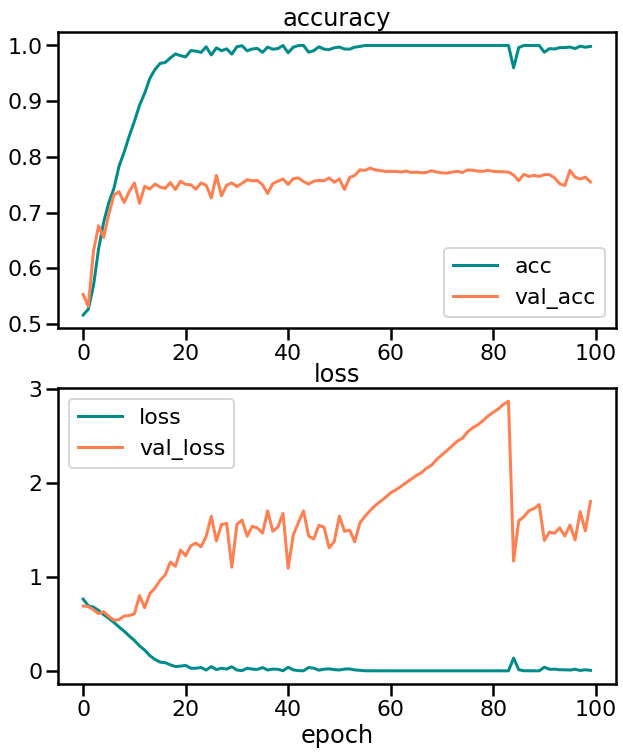

<Figure size 432x288 with 0 Axes>

In [ ]:
name="VGG16"

print(name)

model = PretrainedModel(model_name=name)()

model.compile(optimizer=Adam(lr=1e-5), loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

stack = model.fit(train_ds, epochs=100, 
                  validation_data=test_ds, verbose=1)

score = model.evaluate(test_ds, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

plot_history(stack, filename=output_dir + "history_{}.png".format(name))

# 重みを保存
model.save_weights(output_dir + name + ".hdf5")
# モデルを保存
model.save(output_dir + name + ".h5")

# Core MLに変換する

In [ ]:
!pip install coremltools==4.0b1

In [ ]:
import coremltools as ct

In [ ]:
classifier_config = ct.ClassifierConfig(class_labels=["Johnny's", "Other"])
mlmodel = ct.convert(model, classifier_config=classifier_config,
                     inputs=[ct.ImageType(bias=[-1,-1,-1], scale=1/127)])

Translating MIL ==> MLModel Ops: 100%|██████████| 143/143 [00:02<00:00, 60.22 ops/s]


In [ ]:
mlmodel.short_description = "Johhny's Face Detector based on VGG16"
mlmodel.input_description["input"] = "Input face image to be classified"
mlmodel.output_description["classLabel"] = "Johnny's or not"
mlmodel.output_description["Identity"] = "Probability of prediction"

In [ ]:
# mlmodel.save(output_dir + "JohnnyFaceDetector.mlmodel")